<a href="https://colab.research.google.com/github/Runshi-Yang/JSC270_HW2_2022_RunshiYang/blob/main/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Assigment 2

###Libraries you'll likely need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [ ]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

##PART II - DATA Analysis 

### Initial data exploration

#### 1. Check the columns of your data

In [ ]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


All of them are the expected data types based on their descriptions in [this text file description of the data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

####2. Missing values

In [ ]:
income94.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [ ]:
income94.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

Notice that " ?" is representing the missing value in this column.

In [ ]:
income94.fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [ ]:
income94.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [ ]:
income94.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
income94.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Notice that " ?" is representing the missing value in this column.

In [ ]:
income94.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
income94.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
income94.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
income94.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [ ]:
income94.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [ ]:
income94.hours_per_week.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64

In [ ]:
income94.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Notice that " ?" is representing the missing value in this column.

In [ ]:
income94.gross_income_group.value_counts()

 <=50K    24720
 >50K      7841
Name: gross_income_group, dtype: int64

In [ ]:
income94 = income94.replace(' ?', np.NaN)

Cast missing values to np.NaN

In [ ]:
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

There are 1836 missing values in column 'workclass', 1843 missing values in column 'occupation', 583 missing values in column 'native_country'. Other columns do not have missing values.

####3. Plot the distributions

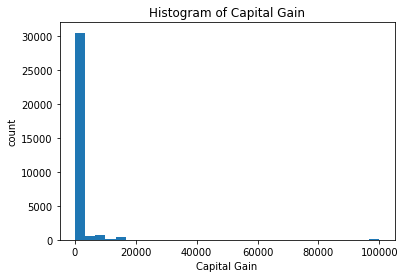

In [ ]:
plt.hist(income94.capital_gain, bins = 30)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('count')
plt.show()

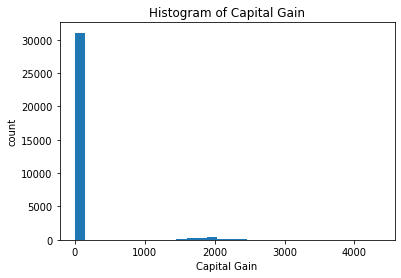

In [ ]:
plt.hist(income94.capital_loss, bins = 30)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('count')
plt.show()

I think these variables should be transformed to categorical variables, since most of (more than 90%) of the captial gain or capital loss are 0, it is reasonable to group them into one group and let the others in one group. I will create two columns named 'zero_gain' and 'zero_loss' with boolean values 'True' or 'False' in the following:

In [ ]:
gain_types = [income94['capital_gain'] == 0, income94['capital_gain'] != 0]
loss_types = [income94['capital_loss'] == 0, income94['capital_loss'] != 0]
type_values = ['true', 'false']
income94['zero_gain'] = np.select(gain_types, type_values)
income94['zero_loss'] = np.select(loss_types, type_values)


Plot the distribution of the new categorical variables:

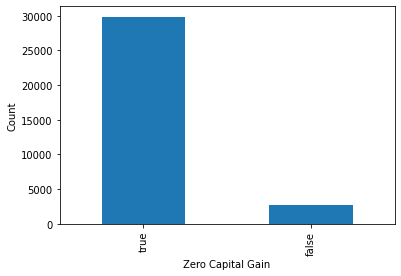

In [ ]:
income94['zero_gain'].value_counts().plot(kind = 'bar')
plt.xlabel('Zero Capital Gain')
plt.ylabel('Count')
plt.show()

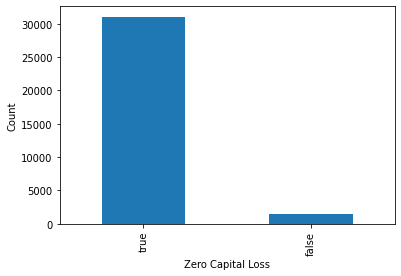

In [ ]:
income94['zero_loss'].value_counts().plot(kind = 'bar')
plt.xlabel('Zero Capital Loss')
plt.ylabel('Count')
plt.show()

####4. Distribution of *fnlwgt*

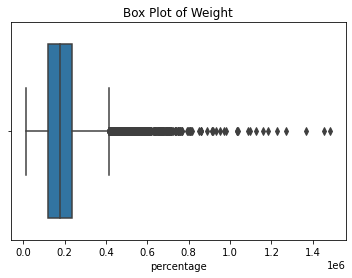

In [ ]:
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('percentage')
plt.title('Box Plot of Weight')
plt.show()

The variable *fnlwgt* is not symmetrically distributed, but positively skewed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fb0267310>,
      dtype=object)

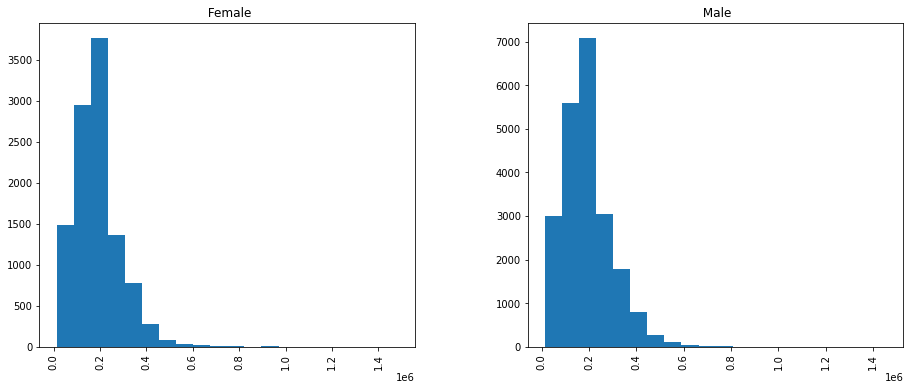

In [ ]:
income94.hist(column = 'fnlwgt', by = "sex", figsize = (15,6), bins = 20)

The distribution of this variable between men and women are very similar, both of them are positively skewed, and the mode is at around 0.2. But there are twice as many male as female with the same final weight.

### Correlation

####1. Find the correlations between age, education_num, and hours_per_week. 

a.  Do any of the variables appear to be correlated? How did you make your assessment?

In [ ]:
corrincome = income94[['age', 'education_num', 'hours_per_week']].corr()
corrincome

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


education_num and hours_per_week appear to be correlated.

b. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?